[source](https://www.kaggle.com/jeongjaenam/guide-kor-dg)
# 한글타닉 필사

## 진행 프로세스(목차)
1. 데이터 셋 확인
* 데이터가 어떻게 구성되어 있는지 확인합니다.
* 대부분의 캐글 데이터들은 잘 정제되어 있습니다.
  하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.
  
2. 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)
* 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다.
  여러 시각화 툴을 사용하여 insight를 얻습니다.
  
3. 특성 공학 (Feature Engineering)
* 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다.
  one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.

4. 모델 개발 및 학습
* sklearn, keras 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을
  사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 또 keras는 딥러닝 개발
  할 때 모델에 집중할 수 있도록 해줍니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을
  사용할 수 도 있습니다. 그리고 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다

5. 모델 예측 및 평가
* Train set 을 가지고 모델을 학습시킨 후, Test set 을 가지고 prediction 합니다.
  그리고 예측 성능이 원하는 수준인지 판단합니다.
  풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다.

이러한 프로세스를 항상 염두에 두고 데이터 분석 및 모델링을 진행하는 것이 중요하다고 생각이 듭니다.

## 1. 모듈 임포트, 데이터 준비

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
data_path = os.path.join(os.getcwd(), 'data')
os.listdir(data_path)

['.kaggle',
 'sample_submission.csv',
 'train.csv',
 'test.csv',
 '.ipynb_checkpoints',
 'kaggle.json']

In [7]:
train_path = os.path.join(data_path, 'train.csv')
test_path = os.path.join(data_path, 'test.csv')
sub_path = os.path.join(data_path, 'sample_submission.csv')

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_submit = pd.read_csv(sub_path)

In [8]:
df_train.shape, df_test.shape, df_submit.shape

((891, 12), (418, 11), (418, 2))

In [9]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


타이타닉 데이터 Feature 설명
* survival - 생존유무, target 값. (0 = 사망, 1 = 생존)
* pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
* sex - 성별
* Age - 나이(세)
* sibsp - 함께 탑승한 형제자매, 배우자 수 총합
* parch - 함께 탑승한 부모, 자녀 수 총합
* ticket - 티켓 넘버
* fare - 탑승 요금
* cabin - 객실 넘버
* bembarked - 탑승 항구

In [14]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 결측치 확인

In [18]:
# df_train.isnull().sum() / df_train.shape[0]
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# df_test.isnull().sum() / df_test.shape[0]
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 1.2 Target Label, Survied 확인

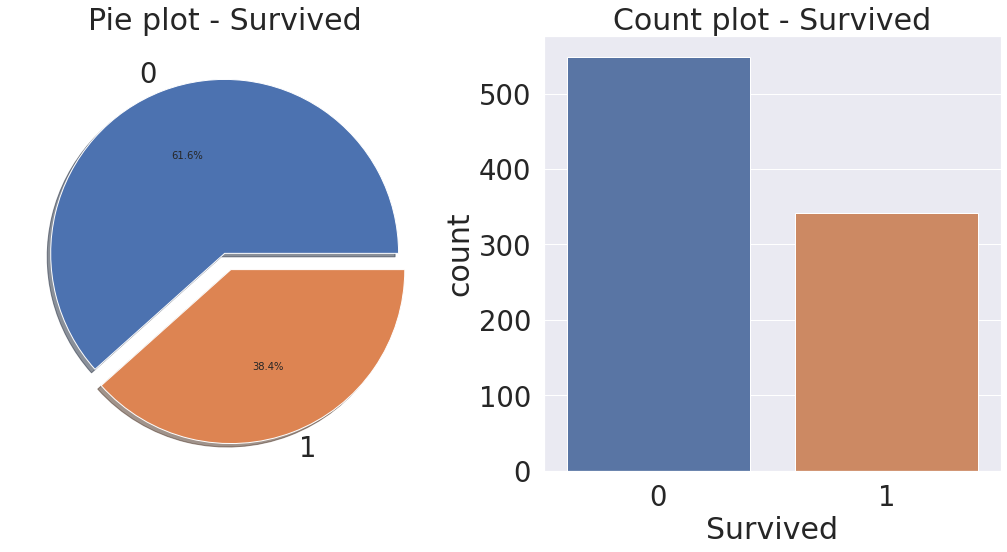

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

target label의 분포가 균일한 지 체크해보니 비교적 균일하게 나옵니다. label이 균일하지 않은 경우 metric에 문제가 생기게 됩니다. 이는 sensitivity, specificity, precision, recall 중 적절한 것을 고르면 커버가 되는 문제인 지 생각해보면 좋을 것 같습니다.

_균일하지 않은 데이터를 학습하는 것_

## 2.  탐색적 데이터 분석 (EDA, Exploratory Data Analysis)

### 2.1 PClass
먼저 Pclass 에 대해서 살펴보겠습니다.

* Pclass는 서수형 데이터입니다.
  즉, 카테고리이면서 순서가 있는 데이터 타입입니다.
  먼저 Pclass 에 따른 생존률의 차이를 살펴보겠습니다.
  
* 엑셀의 피벗 차트와 유사한 작업을 하게 되는데,
  pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있습니다.
  또한 pivot 이라는 메소드도 있습니다.

* Pclass,Survived 를 가져온 후, pclass 로 묶습니다.
  그러고 나면 각 pclass 마다 0, 1 이 count가 되는데,
  이를 평균내면 각 pclass 별 생존률이 나옵니다

* 아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지
  확인할 수 있으며, sum() 을 하면, 216 명중 생존한(survived=1)
  사람의 총합을 주게 됩니다

In [21]:
# pclass 그룹 별 데이터의 카운트
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [22]:
# pclass 그룹 별 생존자 수 합
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [23]:
# crosstab을 통해 편하게 할 수 있습니다.
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [24]:
# mean을 통해 생존률을 구할 수 있습니다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

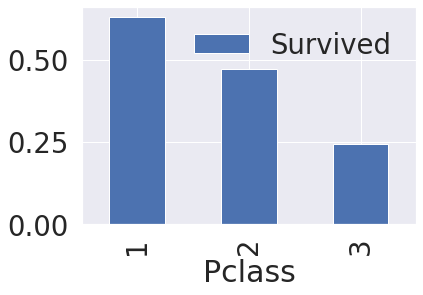

In [25]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

Pclass에 따라 평균 생존율이 변하는 것으로 봐서 아무래도 Pclass는 영향력이 큰 특성인 것 같습니다.

### 2.2 Sex

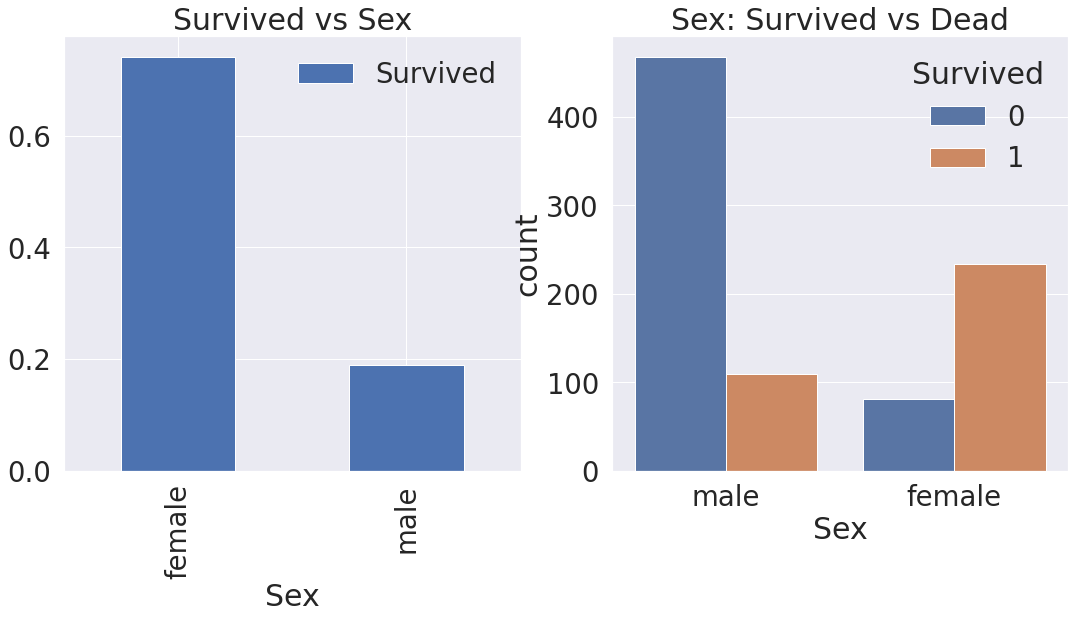

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

보다시피 여성의 생존률이 더 높은 것을 볼 수 있는데, 성별 또한 중요한 특성값임을 알 수 있습니다.

### 2.3 Both Sex and Pclass

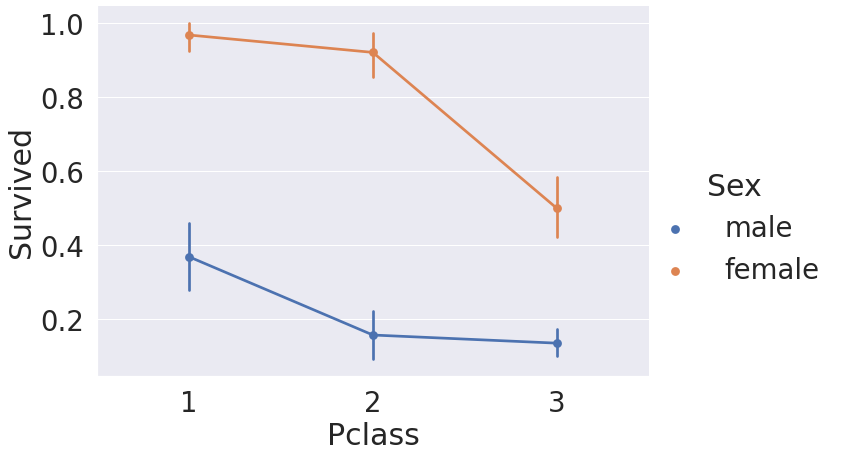

In [27]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
                size=6, aspect=1.5)

모든 클래스에서 여성이 살 확률이 남성보다 훨씬 높습니다.

### 2.4 Age

In [33]:
print(f"제일 나이 많은 탑승객 : {df_train['Age'].max():.1f} years old.")
print(f"제일 어린 탑승객 : {df_train['Age'].min():.1f} years old.")
print(f"탑승객 평균 나이 : {df_train['Age'].mean():.1f} years old.")

제일 나이 많은 탑승객 : 80.0 years old.
제일 어린 탑승객 : 0.4 years old.
탑승객 평균 나이 : 29.7 years old.


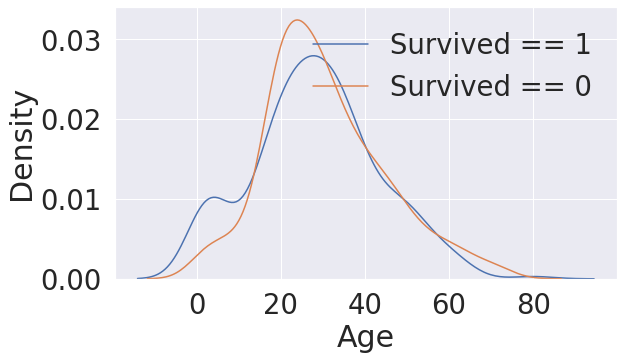

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

약 15세 미만 구간에서 생존률이 상대적으로 높은 것을 확인할 수 있습니다.

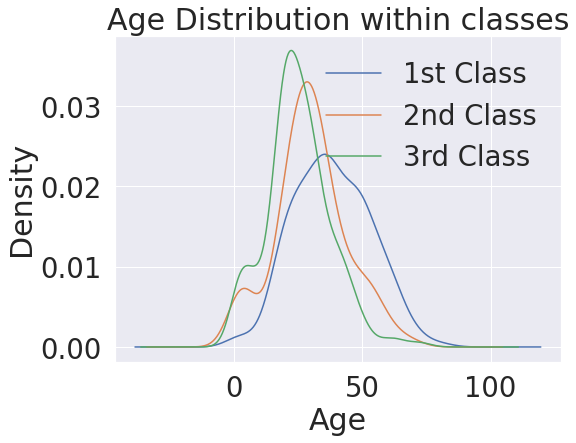

In [35]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

클래스가 높아질수록, 나이 연령대가 높아지는 것을 확인할 수 있습니다.

나이대의 변화에 따른 생존확률을 알아보기 위해 누적 확률을 이용해 시각화 해보겠습니다.

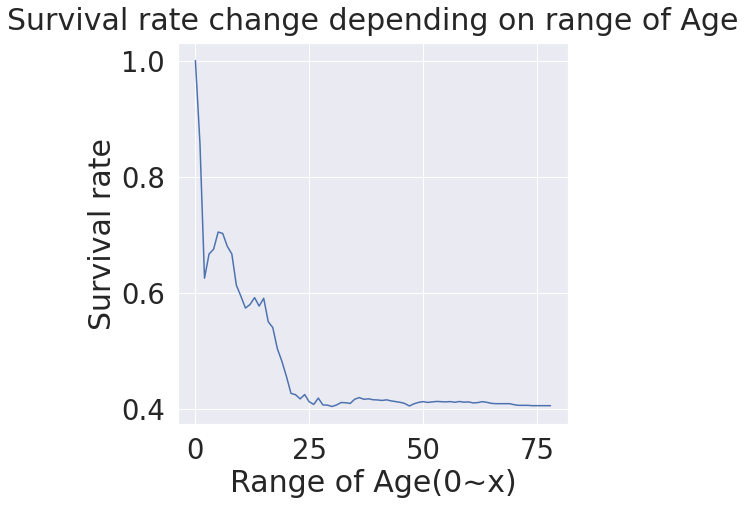

In [36]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

### 

### 2.5 Embarked
Embarked는 탑승한 항구를 의미합니다.

In [37]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

'S', 'C', 'Q' nan으로 분류가 되어있습니다. 정확히 무슨값인지 몰라도, 어떤 카테고리를 의미하는 변수라고 생각할 수 있습니다.

<AxesSubplot:xlabel='Embarked'>

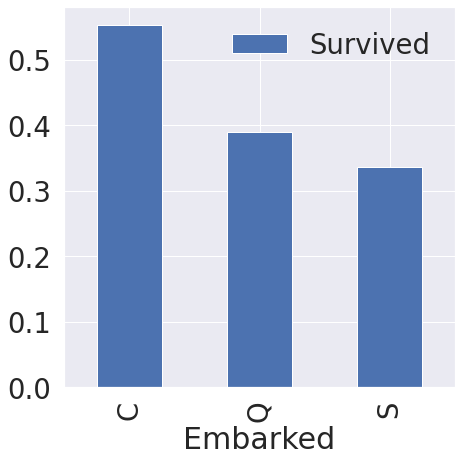

In [38]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

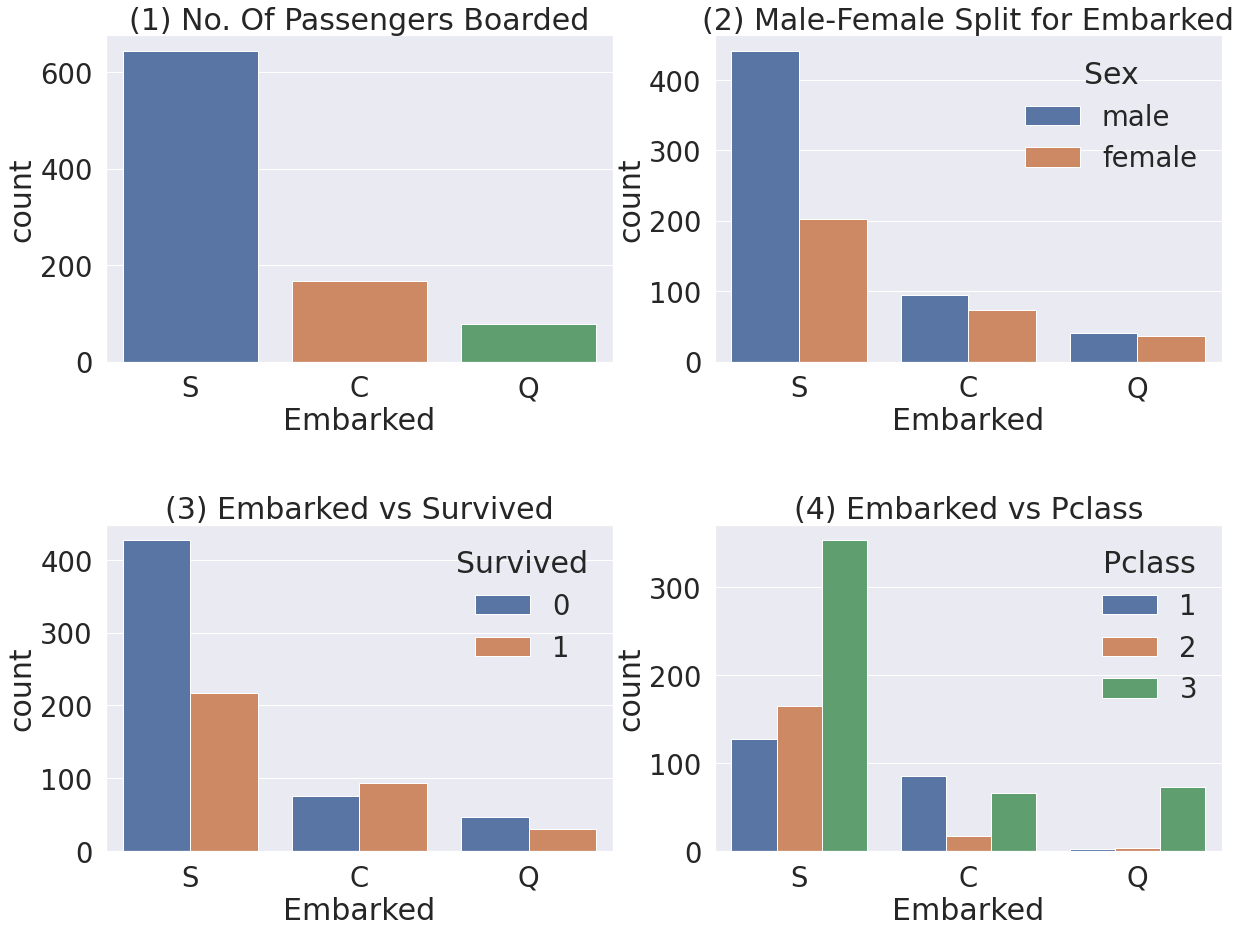

In [39]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1. F1: S에서 가장 많은 사람이 탑승했습니다.
2. F2: C, Q는 남녀 비율이 비슷한 반면 S로는 남성이 많이 탑승했습니다.
3. F3: 각 탑승한 항구에 따른 생존율은 S의 경우 유달리 낮은 걸 볼 수 있습니다.
4. F4: C는 생존한 인원이 더 많은데, 이는 클래스가 높은 사람(1)이 많아서 그렇다고 볼 수 있습니다.

### 2.6 Family - SibSp(형제 자매) + Parch(부모, 자녀)

형제 자매, 부모 자녀를 합치면 함께 탑승한 가족의 수가 됩니다. 이를 이용해 새로운 feature를 만들어보겠습니다.

이 값에 대해서는 합치기 전에 좀 더 분석을 추후에 진행해보면 좋을 것 같습니다. 실제로는 정확히 어떻게 이루어진 변수인지 알아봐야할 것 같습니다.

In [42]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [43]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


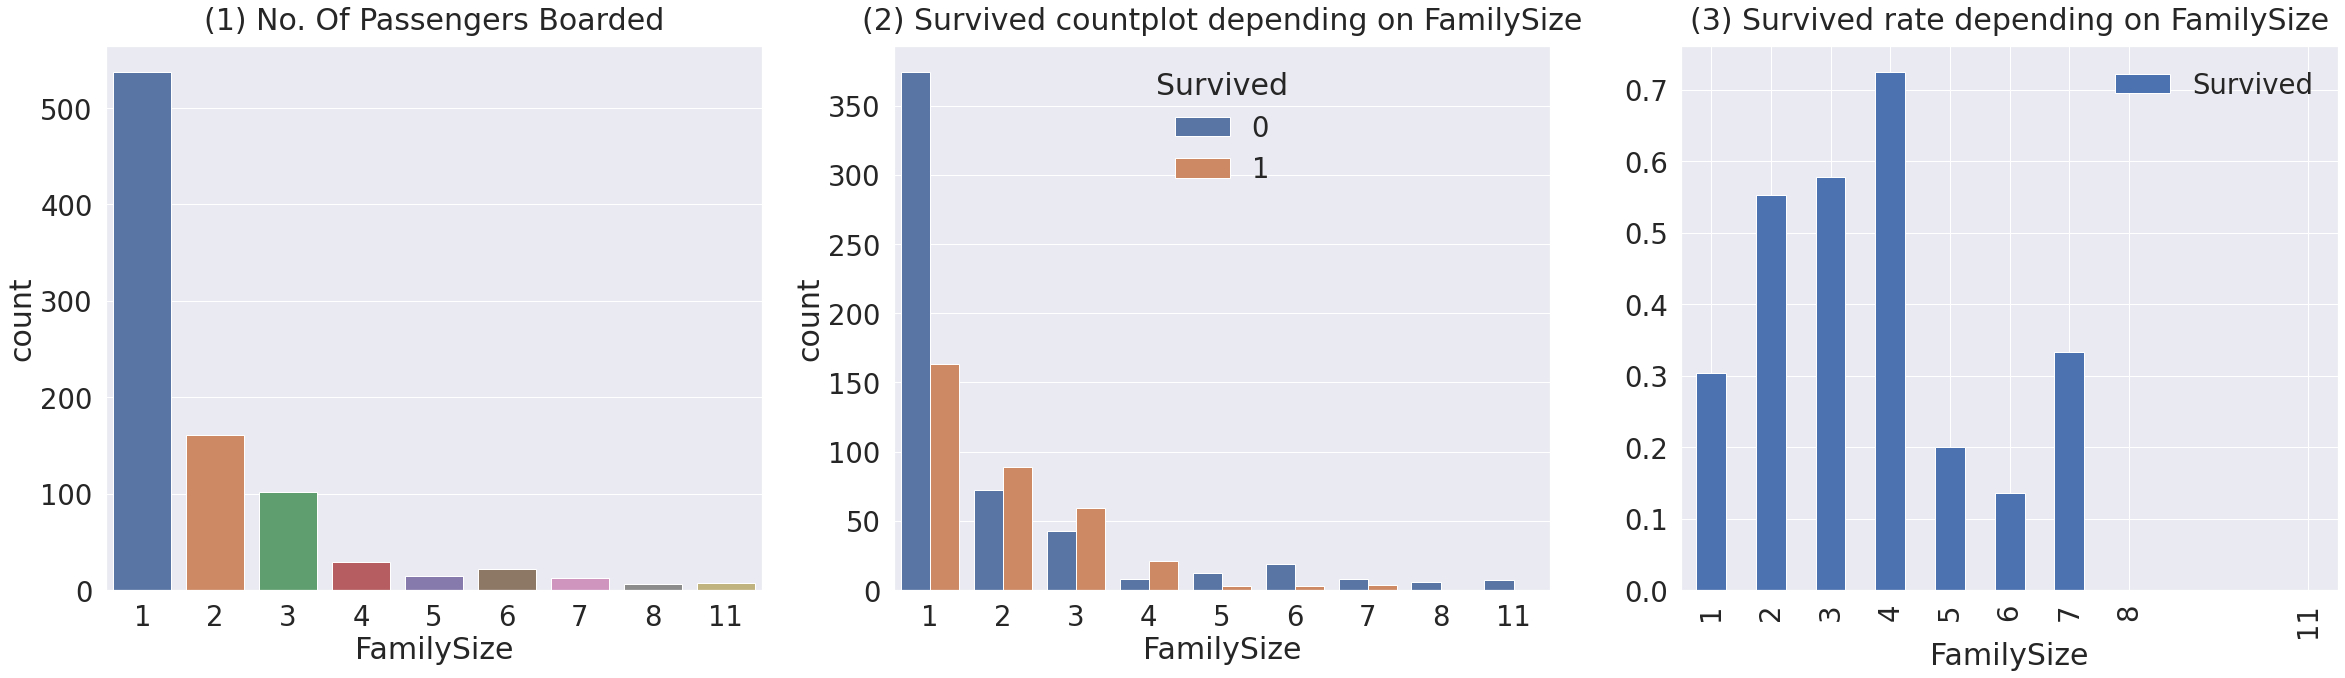

In [53]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1. F1: 가족크기가 1~11까지 있습니다. 혼자 탄 인원이 많습니다.
2. F2~F3: 가존 크기에 따른 생존율 비교 입니다. 4명인 경우가 가장 생존율이 높습니다. 생존율은 1, 5, 6 등에서 가장 낮습니다. 8명, 11명인 경우에는 생존율이 0이라는 것도 알 수 있습니다.

### 2.7 Fare
연속적인 변수인 탑승요금에 대해서 histogram을 그려보도록 하겠습니다.

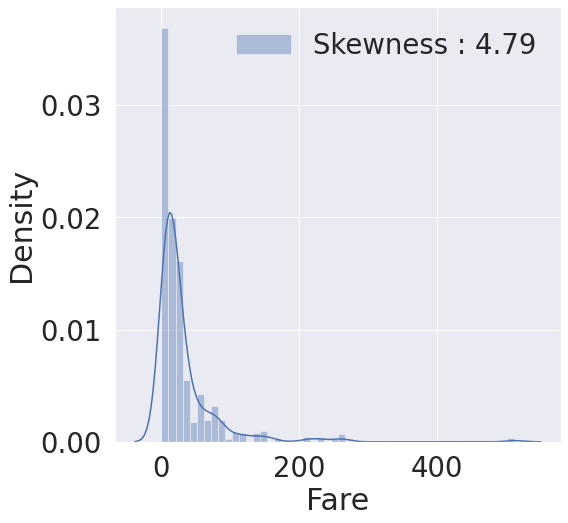

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

위에서 체크한 바에 이하면 test set의 Fare에 Null 값이 존재합니다. 이를 평균값으로 대체해 넣어주겠습니다. 또한 skewness가 크므로 log를 통해 변형해줍니다.

* 정규화하는 다양한 방식: log, sqrt, box-cox
* log 변환: '차이'를 줄이는 개념이므로 이산적인 데이터인지도 생각해볼 것.
* 일반적으로 [-2, 2] 밖에 존재하는 skewness data에 대해서 정규화를 해준다.



In [56]:
# 특이하기도 train set 말고 test set에 Fare 피쳐에 널 값이 하나 존재하는 것을 확인할 수 있었습니다.
# 그래서 평균 값으로 해당 널값을 넣어줍니다.
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

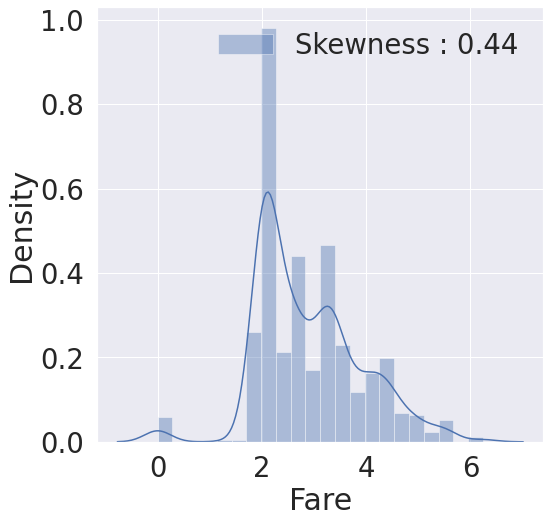

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.
우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.
사실 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.
모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나,
새로운 feature를 추가하는 것을 feature engineering 이라고 하는데,
우리는 다음 챕터에 그것을 살펴볼 것입니다.

__Feature Engineering을 같이 해줄 것인지, 따로 해줄 것인지 각 경우마다 어떤식으로 표기를 해주는 것이 좋을지.__

### 2.8 Cabin

In [61]:
df_train["Cabin"].isnull().sum() / df_train.shape[0]

0.7710437710437711

In [62]:
df_train.head()[["PassengerId", "Cabin"]]

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


### 2.9 Ticket
Ticket은 문자열 자료형으로 되있습니다. 이를 적절히 조합해 Feature Engineering을 진행하는 것이 좋습니다.

In [64]:
df_train['Ticket'].dtype

dtype('O')

In [63]:
df_train['Ticket'].value_counts()

CA. 2343    7
1601        7
347082      7
3101295     6
347088      6
           ..
315151      1
347076      1
350050      1
113788      1
349210      1
Name: Ticket, Length: 681, dtype: int64

In [72]:
len(df_train['Ticket'].unique())

681

In [76]:
# 숫자로만 이루어진 비율
df_train['Ticket'].apply(lambda x: x.isdigit()).sum() / len(df_train['Ticket'])

0.7418630751964085

In [81]:
# 글자가 들어간 티켓 데이터
str_ticket_train = df_train.loc[df_train['Ticket'].apply(lambda x: not(x.isdigit()))]

In [83]:
str_ticket_train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
10              PP 9549
12            A/5. 2151
             ...       
867            PC 17590
874           P/PP 3381
883    C.A./SOTON 34068
884     SOTON/OQ 392076
888          W./C. 6607
Name: Ticket, Length: 230, dtype: object

- [ ] prefix만 따로 빼서 검증할 수도 있겠다.

## 3. 특성 공학 (Feature Engineering)

### 3.1 Fill Null

#### 3.1.1 Fill Null in Age using title

In [84]:
df_train["Age"].isnull().sum()

177

나이에 해당하는 데이터에 null 값이 177개나 있습니다. 일반적으로는 결측치를 채우는 다양한 방법이 있을 수 있습니다. 특별히 타이나닉 데이터의 나이에 대해서는 나이를 추측할 수 있는 title과 다른 통계량(statistics)를 합쳐서 분석해보겠습니다.

여기서 title이란 Miss, Mrr, Mrs와 같은 이름 앞에 들어가는 단어로 이를 통해 나이를 개략적으로 나마 파악할 수 있습니다.

pandas series 에는 data 를 string 으로 바꿔주는 str method,
거기에 정규표현식을 적용하게 해주는 extract method가 있습니다.
이를 사용하여 title 을 쉽게 추출할 수 있습니다. title을 Initial column에 저장하겠습니다

In [85]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

pandas의 crosstab을 이용하여 우리가 추출한 Initial과 Sex간의 count를 살펴보겠습니다. 이를 통해 잘못 기록된 데이터를 파악할 수 있습니다.

In [87]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Title의 다양한 종류를 다음과 같이 재분류하도록 하겠습니다.

In [88]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

좀 더 좋은 방향으로 재분류하는 방법을 생각해봐야겠습니다. 이 경우 분류가 4개로 줄어들긴 하지만 지나치게 하나로 합쳐버리는듯해 보이기도 합니다. (특히 Dr의 경우) 

아무래도 그렇게 많지 않은 인원이라 하나로 뭉쳐도 상관이 없다고 생각한 것 같기도 합니다.

In [89]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

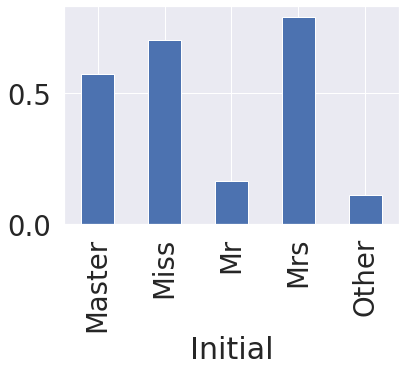

In [90]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

여기서는 Null data를 statistics를 활용해 채워보겠습니다. 여기서 statistics란 train data의 것을 의미하며, test는 항상 못 본 채로 둬야하기 때문에, train에서 얻은 statistics로 test의 Null data를 채워줘야합니다.

일종의 컨닝 페이퍼라고 생각했던 것에 대한 해답이 될 수 있을 것 같다.

In [93]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [94]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

SettingwithCopy Warning

In [96]:
df_train.isnull().sum().loc[df_train.isnull().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [98]:
df_test.isnull().sum().loc[df_test.isnull().sum() > 0]

Cabin    327
dtype: int64

#### 3.1.1 Fill Null in  Embarked

In [99]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


Embarked는 Null value가 2개이고, S에 가장 많은 탑승객이 있었으므로 Null을 S로 채우겠습니다.

In [100]:
df_train['Embarked'].fillna('S', inplace=True)
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin    687
dtype: int64

### 3.2. Change Age(continuous to categorical)

연속형 변수인 나이를 Category화 해주겠습니다. 이 경우 information loss가 발생할 수 있지만 이번 커널에서는 다양한 방법을 소개하는 차원에서 진행하도록 하겠습니다.

In [101]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [102]:
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [103]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

파생 피쳐를 만들었으므로, 원래 컬럼 Age를 삭제하는 편이 맞지만 상관관계가 높아도 모델의 설명력(성능)에 도움이 될 수 있으니 남겨보도록 하겠습니다.

정확히 무슨 의미일까? Age를 두번 보게해서 상관관계가 높아지게 만든다는 걸까? 계산적으로 Age_cat을 보면 Age의 상관관계가 올라갈까?

### 3.3 Change Inital, Embarked and Sex (string to numerical)

문자열 자료형으로 된 3개의 데이터를 컴퓨터가 인식할 수 있도록(학습이 가능하도록) 수치화 시키도록 하겠습니다. map method를 통해 전처리하겠습니다.

In [104]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [105]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [107]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

### Pearrson Correlation

Covariance Matrix의 normalized된 form을 생각할 수 있다. [wiki](https://ko.wikipedia.org/wiki/%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98)
$$R_{ij} = \frac{C_{ij}}{\sqrt{C_{ii}C_{jj}}}$$

* -1로 갈수록 음의 상관관계
* 1로 갈수록 양의 상관관계
* 0은 상관관계가 없음.

---

* _Spearman correlation_ [wiki](https://ko.wikipedia.org/wiki/%EC%8A%A4%ED%94%BC%EC%96%B4%EB%A8%BC_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98)

* _다양한 상관계수_ [link](https://mansoostat.tistory.com/115)

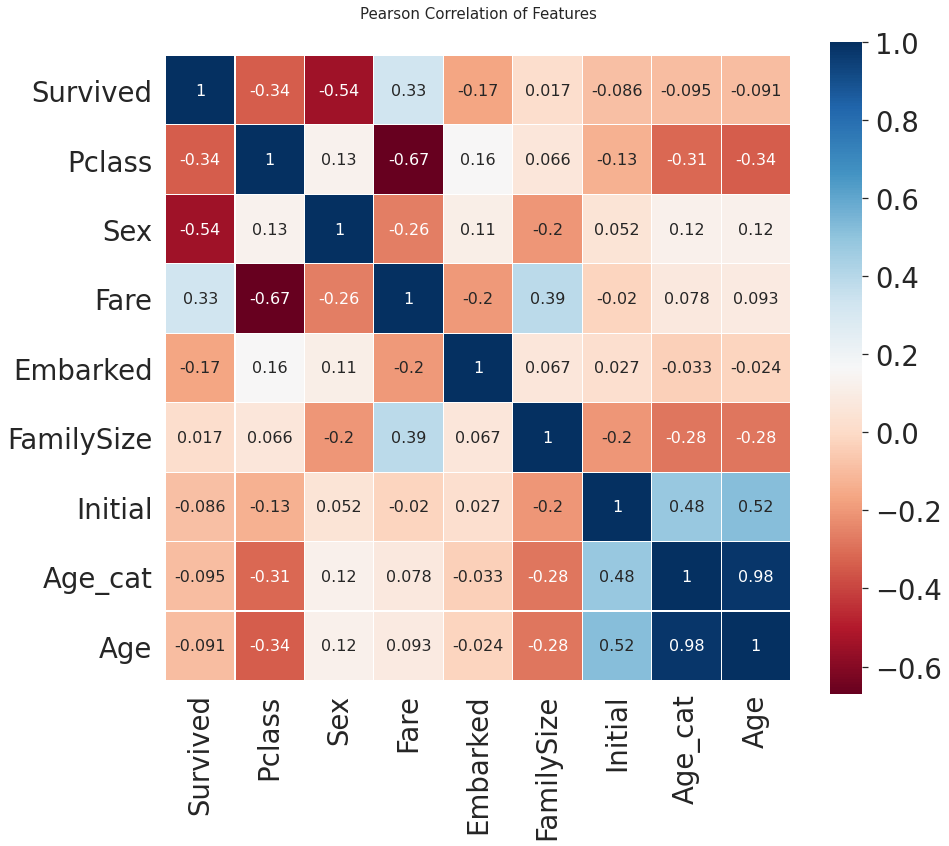

In [108]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

EDA를 통해 살펴본 결과와 비슷합니다. 자기 자신을 제외하고 Age, Age_cat을 제외하면 불필요한 feature가 없습니다. 이는 대부분의 상관관계가 매우 낮게 형성되어있다는 점에서 알아낼 수 있습니다.

만약 1 또는 -1의 상관관계를 가진 feature A, B가 있다면 우리가 얻을 수 있는 정보는 사실 하나일 거고 그 경우는 삭제해주는 편이 좋습니다.
_(삭제하지 않으면 지나치게 그쪽으로 치우쳐서 학습이 진행될까? 만약 그걸 의도한다면 남겨둘 수도 있을까?)_

### 3.4 One-hot encoding on Initial and Embarked

모델의 성능을 올려주기 위해 각 클래스간의 연관성을 Orthogonal(직교)하게 만들어 없애주는 one-hot-encoding을 해주겠습니다. Pandas의 get_dummies를 이용해 진행하겠습니다.

---
Orthogonality ~ Correlation

[kakao - encoding](https://www.kakaobrain.com/blog/6) _마지막 문단 참고_

[유재준님 블로그](http://jaejunyoo.blogspot.com/2018/08/what-is-relationship-between-orthogonal.html)

In [109]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [110]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [111]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [112]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,2.057860,NaN,1,3,0,0,1,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,1.945910,NaN,2,4,0,0,0,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2.270836,NaN,1,6,0,0,1,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,2.159003,NaN,1,2,0,0,1,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,2.508582,NaN,3,2,0,0,0,1,0,0,0,1


카테고리가 100가 넘어가면 차원의 저주에 빠지게 됩니다.

- cs231n : Curse of dimensionality ~ Manifold Hypothesis

### 3.5 Drop columns
이제 필요없는 feature를 버려보겠습니다.

In [113]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [114]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


In [115]:
df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

In [116]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,47.0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,62.0,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,27.0,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,22.0,2.508582,3,2,0,0,0,1,0,0,0,1


In [117]:
df_test.dtypes

Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

### 4. 모델 개발 및 학습

sklearn을 이용해 구현해보겠습니다. 지금 타이타닉 문제는 binary classification 문제임을 염두에 두고 진행해보겠습니다.

가지고 있는 train set에서 target이 되는 survived를 제외한 데이터와, target으로 학습을 진행하고 이를 통해 최적화된 모델로 test set의 생존 유무를 예측하는 방식으로 진행됩니다.